In [48]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import flopy
import pyemu

In [49]:
t_d = "template"
pst = pyemu.Pst(os.path.join(t_d,"freyberg.pst"))

In [50]:
m_d = "master_prior_sweep"
pyemu.os_utils.start_slaves(t_d,"pestpp-swp","freyberg.pst",num_slaves=20,slave_root=".",master_dir=m_d)

In [60]:
obs = pst.observation_data
swgw = obs.loc[obs.obsnme.apply(lambda x: "fa_hw" in x),"obsnme"]
swgw

obsnme
fa_hw_19791230    fa_hw_19791230
fa_hw_19801229    fa_hw_19801229
Name: obsnme, dtype: object

In [61]:
obs_df = pd.read_csv(os.path.join(m_d,"sweep_out.csv"),index_col=0)
obs_df.shape

(200, 4461)

In [62]:
obs_df = obs_df.loc[obs_df.failed_flag==0,:]
obs_df.shape

(200, 4461)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18207d8898>,
      dtype=object)

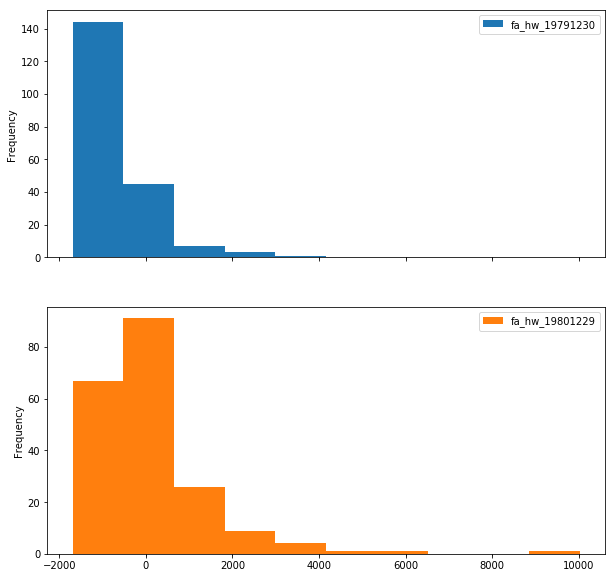

In [63]:
obs_df.loc[:,swgw].plot(kind="hist",subplots=True,figsize=(10,10))

In [64]:
# par_df = pd.read_csv(os.path.join(m_d,"sweep_in.csv"),index_col=0)
# pst.parameter_data.loc[:,"parval1"] = par_df.loc[182,pst.par_names]
# pst.write(os.path.join(m_d,"test.pst"))
# pyemu.os_utils.run("pestpp-ies.exe test.pst",cwd=m_d)

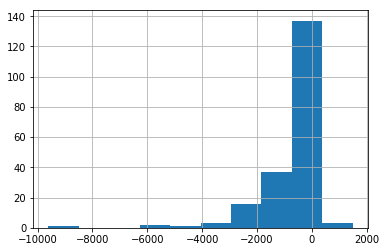

In [65]:
diff = obs_df.loc[:,swgw[0]] - obs_df.loc[:,swgw[1]]
diff.hist()

In [66]:
diff.sort_values()

run_id
50    -9605.044660
91    -6126.152710
137   -5455.385530
63    -4177.619060
173   -3625.204900
51    -3573.500300
79    -3377.322820
147   -2749.519400
92    -2584.030555
48    -2558.430210
142   -2479.839500
59    -2421.226730
106   -2395.411500
160   -2364.811800
179   -2184.862550
118   -2120.789580
155   -1991.973400
170   -1955.057630
31    -1927.502700
80    -1877.277600
71    -1863.646670
169   -1862.946720
113   -1849.655400
178   -1631.904980
101   -1628.526350
139   -1620.579610
114   -1560.008300
46    -1473.778380
33    -1457.304568
28    -1426.425525
          ...     
121     -80.247900
129     -78.553918
130     -63.997800
4       -58.614100
15      -50.669500
163     -42.687500
134     -18.058400
192      -3.851740
187       9.258610
20       13.677490
35       14.668100
61       36.596900
10       40.521300
182      47.134000
180      56.152190
99       81.105300
116     120.840700
119     131.343620
181     131.640570
0       147.513538
62      173.623750
171  

In [67]:
pst.observation_data.loc[:,"obsval"] = obs_df.loc[50,pst.obs_names]


In [70]:
pst.write(os.path.join(t_d,"freyberg.pst"))
pyemu.os_utils.run("pestpp-ies freyberg.pst",cwd=t_d)

noptmax: 0
